In [1]:
import requests
import pandas as pd
import numpy as np
import folium

from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

Get the latitude and longitude of Singapore.

In [3]:
address = 'Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.340863 103.830391822121


Discover the shops by using search query 'Facial Treatment' located within 5000 meteres.

In [4]:
search_query = 'Facial Treatment'
radius = 5000

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [6]:
results = requests.get(url).json()

In [7]:
venues = results['response']['venues']

In [8]:
df = json_normalize(venues)
df.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '54541900498ea6ccd0202697', 'name': 'H...",False,594756f6ca18ea4a75359a72,NaN,SG,Orchard,Singapore,NaN,4320,[Singapore],"[{'label': 'display', 'lat': 1.302447, 'lng': ...",1.302447,103.835948,NaN,Singapore,Sulwhasoo Facial Treatment Studio,v-1575244072,NaN
1,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,522484cb2fc65acdc950504e,"1 Raffles Place, One Raffles Place #23-04",SG,Singapore,Singapore,Raffles Place,113,"[1 Raffles Place, One Raffles Place #23-04 (Ra...","[{'label': 'display', 'lat': 1.339995282247255...",1.339995,103.830929,048616,NaN,knee arthritis treatment,v-1575244072,NaN
2,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",False,4bfa729d5317a5938f9e027f,545 orchard road #05-32,SG,NaN,Singapore,NaN,3933,"[545 orchard road #05-32, Singapore]","[{'label': 'display', 'lat': 1.305527703903155...",1.305528,103.830380,NaN,NaN,Facial Point,v-1575244072,NaN
3,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",False,4bc7237a2f94d13a514d117f,545 orchard road,SG,NaN,Singapore,Angullia park,2849,"[545 orchard road (Angullia park), 238882, Sin...","[{'label': 'display', 'lat': 1.315982, 'lng': ...",1.315982,103.824362,238882,NaN,Facial point,v-1575244072,NaN
4,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",False,4e19410c2271b0e9720490c3,NaN,SG,NaN,Singapore,NaN,3497,[Singapore],"[{'label': 'display', 'lat': 1.362404648713680...",1.362405,103.853263,NaN,NaN,Facial @ Bishan,v-1575244072,NaN


In [9]:
df['categories'][0]

[{'id': '54541900498ea6ccd0202697',
  'name': 'Health & Beauty Service',
  'pluralName': 'Health & Beauty Services',
  'shortName': 'Health & Beauty',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/salon_barber_',
   'suffix': '.png'},
  'primary': True}]

In [10]:
df.columns

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.postalCode', 'location.state', 'name', 'referralId',
       'venuePage.id'],
      dtype='object')

In [11]:
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
print(filtered_columns)

['name', 'categories', 'location.address', 'location.cc', 'location.city', 'location.country', 'location.crossStreet', 'location.distance', 'location.formattedAddress', 'location.labeledLatLngs', 'location.lat', 'location.lng', 'location.postalCode', 'location.state', 'id']


In [12]:
df_filtered = df[filtered_columns]
df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]
df_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sulwhasoo Facial Treatment Studio,"[{'id': '54541900498ea6ccd0202697', 'name': 'H...",NaN,SG,Orchard,Singapore,NaN,4320,[Singapore],"[{'label': 'display', 'lat': 1.302447, 'lng': ...",1.302447,103.835948,NaN,Singapore,594756f6ca18ea4a75359a72
1,knee arthritis treatment,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...","1 Raffles Place, One Raffles Place #23-04",SG,Singapore,Singapore,Raffles Place,113,"[1 Raffles Place, One Raffles Place #23-04 (Ra...","[{'label': 'display', 'lat': 1.339995282247255...",1.339995,103.830929,048616,NaN,522484cb2fc65acdc950504e
2,Facial Point,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",545 orchard road #05-32,SG,NaN,Singapore,NaN,3933,"[545 orchard road #05-32, Singapore]","[{'label': 'display', 'lat': 1.305527703903155...",1.305528,103.830380,NaN,NaN,4bfa729d5317a5938f9e027f
3,Facial point,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",545 orchard road,SG,NaN,Singapore,Angullia park,2849,"[545 orchard road (Angullia park), 238882, Sin...","[{'label': 'display', 'lat': 1.315982, 'lng': ...",1.315982,103.824362,238882,NaN,4bc7237a2f94d13a514d117f
4,Facial @ Bishan,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",NaN,SG,NaN,Singapore,NaN,3497,[Singapore],"[{'label': 'display', 'lat': 1.362404648713680...",1.362405,103.853263,NaN,NaN,4e19410c2271b0e9720490c3


In [13]:
def get_category_type(row):
    category_list = row['categories']
    
    if len(category_list) == 0:
        return None
    else:
        return category_list[0]['name']
    
df_filtered['categories'] = df_filtered.apply(get_category_type, axis = 1)
df_filtered.head()

/Users/SAM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sulwhasoo Facial Treatment Studio,Health & Beauty Service,NaN,SG,Orchard,Singapore,NaN,4320,[Singapore],"[{'label': 'display', 'lat': 1.302447, 'lng': ...",1.302447,103.835948,NaN,Singapore,594756f6ca18ea4a75359a72
1,knee arthritis treatment,Doctor's Office,"1 Raffles Place, One Raffles Place #23-04",SG,Singapore,Singapore,Raffles Place,113,"[1 Raffles Place, One Raffles Place #23-04 (Ra...","[{'label': 'display', 'lat': 1.339995282247255...",1.339995,103.830929,048616,NaN,522484cb2fc65acdc950504e
2,Facial Point,Cosmetics Shop,545 orchard road #05-32,SG,NaN,Singapore,NaN,3933,"[545 orchard road #05-32, Singapore]","[{'label': 'display', 'lat': 1.305527703903155...",1.305528,103.830380,NaN,NaN,4bfa729d5317a5938f9e027f
3,Facial point,Cosmetics Shop,545 orchard road,SG,NaN,Singapore,Angullia park,2849,"[545 orchard road (Angullia park), 238882, Sin...","[{'label': 'display', 'lat': 1.315982, 'lng': ...",1.315982,103.824362,238882,NaN,4bc7237a2f94d13a514d117f
4,Facial @ Bishan,Cosmetics Shop,NaN,SG,NaN,Singapore,NaN,3497,[Singapore],"[{'label': 'display', 'lat': 1.362404648713680...",1.362405,103.853263,NaN,NaN,4e19410c2271b0e9720490c3


Produce the map showing the location of shops that have facial treatment business.

In [14]:
venues_map = folium.Map(location = [latitude,longitude], zoom_start = 12)

for lat, lng, label in zip(df_filtered['lat'], df_filtered['lng'], df_filtered['categories']):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
    
venues_map

Based on the map result above, we can discover that there are some facial treatment shops situated very close together while some just scattered around all over the places.

Before we start to pick the location for our demographic study, we need to cluster them into different groups.

In [15]:
from folium.plugins import MarkerCluster

cluster_map = folium.Map(location = [latitude,longitude], zoom_start = 13)

cluster = MarkerCluster().add_to(cluster_map)

for lat, lng, label in zip(df_filtered['lat'], df_filtered['lng'], df_filtered['categories']):
    folium.Marker(
        [lat, lng],
        icon = None,
        popup = label,
    ).add_to(cluster)
    
cluster_map

From the map above, we can identify three major locations that the facial treatment business owners pick.
As for our case study, we will avoid selecting the Orchard area although it has the highest shops number as this area are well known for shopping paradise. 

We will study the demographics for another two locations so that we can compare them and find out the similarities. The demographic data can be download from [here](https://www.singstat.gov.sg/-/media/files/find_data/population/statistical_tables/singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20112019.zip) which contain infomation such as age group, sex, type of dwelling and population from year 2011 until 2019 based on different areas. As for our study, we will focus on the latest data which is year 2019.

In [16]:
df2 = pd.read_csv('respopagesextod2011to2019.csv')
df2.head()

,PA,SZ,AG,Sex,TOD,Pop,Time
0,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 1- and 2-Room Flats,0,2011
1,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 3-Room Flats,10,2011
2,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 4-Room Flats,30,2011
3,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 5-Room and Executive Flats,50,2011
4,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HUDC Flats (excluding those privatised),0,2011


In [17]:
df2.dtypes

PA      object
SZ      object
AG      object
Sex     object
TOD     object
Pop      int64
Time     int64
dtype: object

In [18]:
df2 = df2[df2['Time'] == 2019]
df2.head()

,PA,SZ,AG,Sex,TOD,Pop,Time
785536,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 1- and 2-Room Flats,0,2019
785537,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 3-Room Flats,10,2019
785538,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 4-Room Flats,10,2019
785539,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 5-Room and Executive Flats,20,2019
785540,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HUDC Flats (excluding those privatised),0,2019


In [19]:
df2['AG'].unique()

array(['0_to_4', '5_to_9', '10_to_14', '15_to_19', '20_to_24', '25_to_29',
       '30_to_34', '35_to_39', '40_to_44', '45_to_49', '50_to_54',
       '55_to_59', '60_to_64', '65_to_69', '70_to_74', '75_to_79',
       '80_to_84', '85_to_89', '90_and_over'], dtype=object)

The existing data have population with age gap of 5 years from 0 to 90 and above. To make our study less complicated, we will group the population into five different categories based on the data above which are 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'. 

In [20]:
Age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
Child = ['0_to_4', '5_to_9']
Teenager = ['10_to_14', '15_to_19']
Young_Adult = ['20_to_24', '25_to_29', '30_to_34']
Adult = ['35_to_39', '40_to_44', '50_to_54']
Senior = ['55_to_59', '60_to_64', '65_to_69', '70_to_74', '75_to_79', '80_to_84', '85_to_89', '90_and_over']
Age_group = [Child, Teenager, Young_Adult, Adult, Senior] 

In [21]:
for i in range(5):
    for item in Age_group[i]:
        df2.loc[df2[df2['AG'] == item].index, 'AC'] = Age_labels[i]

In [22]:
df2.head()

,PA,SZ,AG,Sex,TOD,Pop,Time,AC
785536,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 1- and 2-Room Flats,0,2019,Child
785537,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 3-Room Flats,10,2019,Child
785538,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 4-Room Flats,10,2019,Child
785539,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 5-Room and Executive Flats,20,2019,Child
785540,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HUDC Flats (excluding those privatised),0,2019,Child


In [23]:
df2.tail()

,PA,SZ,AG,Sex,TOD,Pop,Time,AC
883723,Yishun,Yishun West,90_and_over,Females,HDB 5-Room and Executive Flats,20,2019,Senior
883724,Yishun,Yishun West,90_and_over,Females,HUDC Flats (excluding those privatised),0,2019,Senior
883725,Yishun,Yishun West,90_and_over,Females,Landed Properties,0,2019,Senior
883726,Yishun,Yishun West,90_and_over,Females,Condominiums and Other Apartments,10,2019,Senior
883727,Yishun,Yishun West,90_and_over,Females,Others,40,2019,Senior


In [24]:
PA = df2.groupby('PA')
df_AMK = PA.get_group('Ang Mo Kio')
df_TP = PA.get_group('Toa Payoh')

In [25]:
df_AMK.head()

,PA,SZ,AG,Sex,TOD,Pop,Time,AC
785536,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 1- and 2-Room Flats,0,2019,Child
785537,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 3-Room Flats,10,2019,Child
785538,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 4-Room Flats,10,2019,Child
785539,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 5-Room and Executive Flats,20,2019,Child
785540,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HUDC Flats (excluding those privatised),0,2019,Child


In [26]:
table_AMK = pd.pivot_table(df_AMK, values = 'Pop', index = ['Sex'], columns = 'AC', aggfunc = np.sum)
table_AMK

AC,Adult,Child,Senior,Teenager,Young Adult
Sex,,,,,
Females,18380,5770,32260,7560,15240
Males,16490,5880,27720,7750,14810


In [27]:
table_TP = pd.pivot_table(df_TP, values = 'Pop', index = ['Sex'], columns = 'AC', aggfunc = np.sum)
table_TP

AC,Adult,Child,Senior,Teenager,Young Adult
Sex,,,,,
Females,13670,4520,23710,5340,11370
Males,12150,4780,19680,5580,10760


From the tables above we can see that the largest group of population in both areas are senior citizen. The second largest group would be the adult while the smallest group is child. Interestingly, the data shows there are more females in both these areas except for child and teenager group. As the facial treatment customers are more likely to be female adults, this data result meet our expectation.

Now let us compare the type of dwelling for both these areas as these may bring some useful insight for our data analysis.

In [28]:
print('Population at Ang Mo Kio:', df_AMK['Pop'].sum())
print('Population at Toa Payoh:',  df_TP['Pop'].sum())

Population at Ang Mo Kio: 164430
Population at Toa Payoh: 121060


In [29]:
table1 = pd.pivot_table(df_AMK, values = 'Pop', index = ['TOD'], aggfunc = np.sum)
table1.columns = ['AMK']

table2 = pd.pivot_table(df_TP, values = 'Pop', index = ['TOD'], aggfunc = np.sum)
table2.columns = ['TP']

table_TOD = pd.concat([table1, table2], axis = 1)
table_TOD

,AMK,TP
TOD,,
Condominiums and Other Apartments,13880,14040
HDB 1- and 2-Room Flats,11230,10080
HDB 3-Room Flats,56830,35520
HDB 4-Room Flats,43550,31270
HDB 5-Room and Executive Flats,21650,23370
HUDC Flats (excluding those privatised),0,0
Landed Properties,16070,5750
Others,1220,1030


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

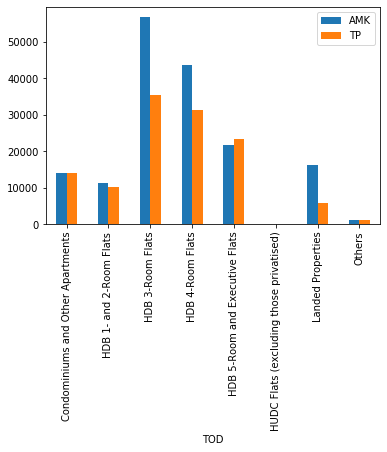

In [31]:
table_TOD.plot.bar()

From the chart above, we notice that the numbers of 3-Room and 4 Room Flats for Ang Mo Kio are much higher compare to Tao Payoh. There are also more landed properties at Ang Mo Kio compare to Toa Payoh. As the price for landed properties in Singapore are much higher than the HDB flats, we may suggest that the average income for people who stay at Ang Mo Kio is higher than Tao Payoh.

As the number of shops for both areas are about the same, we might conclude that Ang Mo Kio have more growth space compare to Toa Payoh as the former has higher population. Next, we will investigate what are the most common venues for Ang Mo Kio areas. From there, we might able to extract some useful information to determine the suitable location for our shop.

In [32]:
address1 = 'Ang Mo Kio, Singapore'

location1 = geolocator.geocode(address1)
print('Ang Mo Kio: ', location1.latitude, ', ', location1.longitude)

Ang Mo Kio:  1.3700733 ,  103.8495157


In [33]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, location1.latitude, location1.longitude, VERSION, 1000, 100)

In [34]:
results1 = requests.get(url).json()

In [35]:
venues1 = results1['response']['venues']

In [36]:
df_v = json_normalize(venues1)
df_v.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f6931735', 'name': 'G...",False,4dcdbfc5d22deadedd41435a,Ang Mo Kio Ave 8,SG,Singapore,Singapore,Ang Mo Kio MRT Station,42,"[Ang Mo Kio Ave 8 (Ang Mo Kio MRT Station), Si...","[{'label': 'display', 'lat': 1.369700486470190...",1.369700,103.849420,NaN,NaN,NaN,Passenger Pick-Up / Alighting Point,v-1575244077
1,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",False,4b15f661f964a52012b623e3,#B2-26 AMK Hub,SG,Singapore,Singapore,53 Ang Mo Kio Ave 3,112,"[#B2-26 AMK Hub (53 Ang Mo Kio Ave 3), 569933,...","[{'label': 'display', 'lat': 1.369279288408139...",1.369279,103.848886,NaN,569933,NaN,FairPrice Xtra,v-1575244077
2,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",False,4b08e419f964a520281323e3,2450 Ang Mo Kio Ave. 8,SG,Singapore,Singapore,NaN,60,"[2450 Ang Mo Kio Ave. 8, 569811, Singapore]",NaN,1.369557,103.849685,NaN,569811,NaN,Ang Mo Kio MRT Station (NS16),v-1575244077
3,"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",False,4c7d0ddff56a3704bd930946,Ang Mo Kio Ave 3,SG,Singapore,Singapore,NaN,160,"[Ang Mo Kio Ave 3, Singapore]","[{'label': 'display', 'lat': 1.369306349641836...",1.369306,103.850736,NaN,NaN,NaN,Bus Stop 54261 (Ang Mo Kio Station),v-1575244077
4,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",False,52a1cc5c11d2fb73546d708d,"#01-03, 2450 Ang Mo Kio Ave 8",SG,Singapore,Singapore,Ang Mo Kio Ave 3,62,"[#01-03, 2450 Ang Mo Kio Ave 8 (Ang Mo Kio Ave...","[{'label': 'display', 'lat': 1.369684074550501...",1.369684,103.849108,NaN,569811,NaN,Western Union,v-1575244077


In [37]:
df_v['categories'][0]

[{'id': '4bf58dd8d48988d1f6931735',
  'name': 'General Travel',
  'pluralName': 'General Travel',
  'shortName': 'Travel',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/default_',
   'suffix': '.png'},
  'primary': True}]

In [38]:
def get_category(row):
    if len(row['categories']) == 0:
        return None
    else:
        return row['categories'][0]['name']

In [39]:
filt_columns = ['name', 'categories', 'location.lat', 'location.lng']
df_v1 = df_v.loc[:, filt_columns]
df_v1.head()

,name,categories,location.lat,location.lng
0,Passenger Pick-Up / Alighting Point,"[{'id': '4bf58dd8d48988d1f6931735', 'name': 'G...",1.369700,103.849420
1,FairPrice Xtra,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",1.369279,103.848886
2,Ang Mo Kio MRT Station (NS16),"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",1.369557,103.849685
3,Bus Stop 54261 (Ang Mo Kio Station),"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",1.369306,103.850736
4,Western Union,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",1.369684,103.849108


In [40]:
df_v1['categories'] = df_v1.apply(get_category, axis = 1)
df_v1.head()

,name,categories,location.lat,location.lng
0,Passenger Pick-Up / Alighting Point,General Travel,1.369700,103.849420
1,FairPrice Xtra,Supermarket,1.369279,103.848886
2,Ang Mo Kio MRT Station (NS16),Train Station,1.369557,103.849685
3,Bus Stop 54261 (Ang Mo Kio Station),Bus Stop,1.369306,103.850736
4,Western Union,Financial or Legal Service,1.369684,103.849108


In [41]:
df_v1['categories'].value_counts(ascending = False).head()

Cosmetics Shop        5
Salon / Barbershop    4
Bakery                3
Playground            3
Snack Place           3
Name: categories, dtype: int64

In [42]:
idx = df_v1[(df_v1['categories'] == 'Residential Building (Apartment / Condo)')].index
idx

Int64Index([], dtype='int64')

In [43]:
df_v1.drop(idx, inplace = True)

df_v1['categories'].value_counts(ascending = False).head()

Cosmetics Shop        5
Salon / Barbershop    4
Bakery                3
Playground            3
Snack Place           3
Name: categories, dtype: int64

The result above show the top 5 common venue at this area. The number behind indicate the total numbers of that particular type of shop for this area. As we need a well-trafficked area for our business, we can try to pick the location nearby to these shops as these are some of the hot places for this area.

As for those who might want to choose other places beside the areas of our study or have the plan to expand the business to other areas, we can try to pick the areas with similar demographics. To locate these areas, we might cluster them using the dataset we obtained above.

In [44]:
#Create an empty DataFrame
table_all = pd.DataFrame(columns = ['0'])

In [45]:
for i in PA:
    table10 = pd.pivot_table(i[1], values = 'Pop', index = ['TOD'], aggfunc = np.sum)
    table11 = pd.pivot_table(i[1], values = 'Pop', index = ['AC'], aggfunc = np.sum)
    table13 = pd.pivot_table(i[1], values = 'Pop', index = ['Sex'], aggfunc = np.sum)
    table = pd.concat([table10, table11, table13])
    table.columns = [i[0]]
    table_all = pd.concat([table_all, table], axis = 1, sort = False) 

table_all.drop(columns = ['0'], inplace = True)
table_all.T

,Condominiums and Other Apartments,HDB 1- and 2-Room Flats,HDB 3-Room Flats,HDB 4-Room Flats,HDB 5-Room and Executive Flats,HUDC Flats (excluding those privatised),Landed Properties,Others,Adult,Child,Senior,Teenager,Young Adult,Females,Males
Ang Mo Kio,13880,11230,56830,43550,21650,0,16070,1220,34870,11650,59980,15310,30050,85770,78660
Bedok,54430,10120,55870,67050,45550,0,44230,2720,59250,21660,95700,27940,54130,144160,135810
Bishan,16730,1200,5010,28680,25490,0,10450,670,17740,6700,29670,9170,18090,45500,42730
Boon Lay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bukit Batok,26440,5160,28050,54400,33400,0,5900,790,33300,13770,43950,16600,34840,78600,75540
Bukit Merah,13340,22510,36070,48450,30590,0,440,1200,33670,12750,54840,13020,26540,79230,73370
Bukit Panjang,18880,2560,10200,56110,48610,0,3240,100,30290,13930,37820,16180,30870,70840,68860
Bukit Timah,36840,160,870,2620,3520,0,32840,870,16640,7980,22940,9810,13460,41710,36010
Central Water Catchment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changi,0,0,370,0,0,0,330,1090,460,260,330,250,320,910,880


In [46]:
new_df = table_all.T
new_df.shape

(55, 15)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X_std = StandardScaler().fit_transform(new_df)

/Users/SAM/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/SAM/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


We will use elbow method to evaluate the best k value for our dataset.

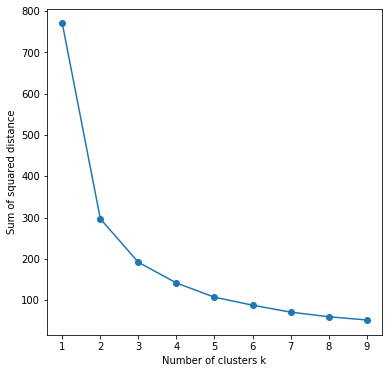

In [48]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(X_std)
    sse.append(model.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance');

In our case, its quite hard for us to figure out what is the best number of clusters to be used. The curve does not have obvious point show sign of flattening. We will try to pick the mid point of the curve which is 5 number of clusters.

In [49]:
model = KMeans(n_clusters = 5, random_state = 0)
model.fit(X_std)
model.labels_

array([4, 0, 1, 3, 1, 4, 1, 1, 3, 3, 3, 2, 1, 3, 4, 0, 1, 2, 4, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 2, 4, 3, 3, 3, 1, 2, 1, 3, 3, 3,
       3, 3, 2, 3, 3, 4, 3, 3, 3, 2, 2], dtype=int32)

In [50]:
new_df['labels'] = model.labels_

In [51]:
new_df2 = new_df['labels']
new_df2 = new_df2.reset_index()
new_df2.head()

,index,labels
0,Ang Mo Kio,4
1,Bedok,0
2,Bishan,1
3,Boon Lay,3
4,Bukit Batok,1


In [52]:
new_df2 = new_df2.groupby('labels')['index'].apply(list)
new_df2

labels
0                                     [Bedok, Hougang]
1    [Bishan, Bukit Batok, Bukit Panjang, Bukit Tim...
2    [Choa Chu Kang, Jurong West, Punggol, Sengkang...
3    [Boon Lay, Central Water Catchment, Changi, Ch...
4    [Ang Mo Kio, Bukit Merah, Geylang, Kallang, Qu...
Name: index, dtype: object

We will list out areas that have been clustered with label number 4 as both 'Ang Mo Kio' and 'Tao Payoh' fall under this group. 

In [53]:
new_df2.iloc[4]

['Ang Mo Kio', 'Bukit Merah', 'Geylang', 'Kallang', 'Queenstown', 'Toa Payoh']

From the result above, we can conclude that areas that have been categorized with same label probably also have similar demographic. Therefore for those who wish to start their business area outside our scope of study, they might consider locations listed above. They might wish to do some location analysis first before making any decision.